# Recipe classification `14 points`

Source: `recipes.csv`, which I scraped from... somewhere. Each row represents a recipe.

**Topics**

* Filtering
* Text analysis
* Classification

In [1]:
# import the csv into Python
import pandas as pd
pd.set_option("display.max_columns",500)

df = pd.read_csv('recipes.csv')
df.describe()
df.sample(5)

,cuisine,id,ingredient_list
10260,french,17976,"sugar, cinnamon, calvados, lemon zest, water, ..."
33213,mexican,25313,"shredded cheddar cheese, garlic, tomato paste,..."
14656,spanish,19894,"large egg whites, potatoes, chopped onion, par..."
33040,mexican,26560,"lime juice, tomatillos, garlic cloves, avocado..."
33400,italian,20961,"vegetable oil, vanilla extract, milk, butter, ..."


In [2]:
df.dtypes

cuisine            object
id                  int64
ingredient_list    object
dtype: object

## Filtering and aggregating `3 points`

### What is the most common cuisine in this dataset?

### Plot a bar graph of cuisine popularity, with the most common at the top

<AxesSubplot:title={'center':'The most common cuisine is italian.'}>

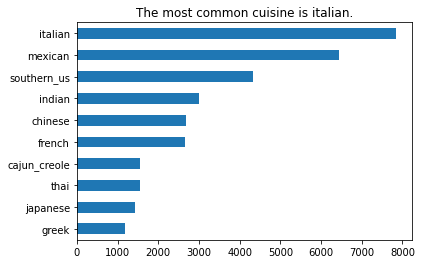

In [3]:
df.cuisine.value_counts().head(10).sort_values(ascending=True).plot(kind="barh",title='The most common cuisine is italian.')


### Clean up the names so we get nicer graphics

"southern_us" should be "Southern US," "russian" should be "Russian," etc.

In [4]:
df.cuisine=df.cuisine.str.replace("_"," ")
df.ingredient_list=df.ingredient_list.str.replace("_"," ")

# capitalizing all the letters with title
df.cuisine=df.cuisine.str.title()
df.ingredient_list=df.ingredient_list.str.title()

# replace Us with US
df.cuisine=df.cuisine.str.replace("Us","US")
    
df.sample(5)

,cuisine,id,ingredient_list
38454,Cajun Creole,35649,"Jasmine Rice, Vegetable Oil, Salt, Oregano, Ja..."
28408,Russian,23351,"Mayonaise, Salt, Black Pepper, Pomegranate Jui..."
18923,Filipino,18570,"Melted Butter, Grated Parmesan Cheese, Tilapia..."
6912,French,36554,"Swiss Cheese, Onions, Grated Parmesan Cheese, ..."
21417,Indian,32863,"Chili Powder, Cilantro Leaves, Salt, Garam Mas..."


In [5]:
# add binary column for if it is Greek or if it is Mexican

# get_dummies create binary columns for a given column
df2=pd.get_dummies(df['cuisine'])
df2.sample(5)


# merge the 2 dataframes
df = pd.concat([df, df2], axis=1)
df.sample(5)

,cuisine,id,ingredient_list,Brazilian,British,Cajun Creole,Chinese,Filipino,French,Greek,Indian,Irish,Italian,Jamaican,Japanese,Korean,Mexican,Moroccan,Russian,Southern US,Spanish,Thai,Vietnamese
21915,Chinese,1071,"Sugar, Minced Garlic, Paprika, Cayenne Pepper,...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21072,Mexican,406,"Tomato Paste, Water, Ground Black Pepper, Sour...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
18606,Mexican,28145,"Tomatoes, Tortillas, Salsa, Garlic Salt, Lime ...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6119,Mexican,38729,"Black Pepper, Low Sodium Chicken Broth, Ground...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20901,Indian,45380,"Active Dry Yeast, Greek Yogurt, Eggs, Flour, S...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Text analysis

### Build a classifier to predict whether a recipe is Greek or not `2 points`

In [6]:
# vectorzie each word in ingredient_list to get a bag of words, makes common words fade away in importance and limit the features makes it run faster

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(df.ingredient_list)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,active,added,adobo,agave,ale,alfredo,all,allspice,almond,almonds,amaretto,amchur,american,anaheim,ancho,anchovies,anchovy,and,andouille,angel,anise,apple,apples,apricot,apricots,arbol,arborio,arrowroot,artichok,artichoke,artichokes,arugula,asafetida,asafoetida,asiago,asian,asparagus,avocado,baby,back,bacon,bags,baguette,baked,baking,balsamic,bamboo,banana,bananas,barbecue,barley,base,basil,basmati,bass,bay,bean,beans,beansprouts,beaten,beef,beer,beets,belgian,bell,belly,berries,bertolli,best,bird,biscuits,bittersweet,black,blackberries,blanched,blend,blue,blueberries,boiled,boiling,bok,bone,boneless,bones,bonito,bonnet,boston,bottled,bought,bouillon,bourbon,bow,brandy,bread,breadcrumbs,breakfast,breast,breasts,brewed,brie,brine,brisket,broccoli,broth,brown,brussels,buckwheat,bulb,buns,butt,butter,buttermilk,butternut,button,cabbage,cachaca,cajun,cake,cakes,calamansi,california,candied,candy,cane,canned,cannellini,canola,capers,caps,capsicum,caramel,caraway,cardamom,carrot,carrots,cashew,cashews,casings,caster,catfish,cauliflower,cayenne,celery,center,cereal,chaat,champagne,chard,chayotes,cheddar,chees,cheese,cherries,cherry,chervil,chestnuts,chicken,chickens,chickpea,chickpeas,chile,chiles,chili,chilies,chillies,chinese,chipotle,chipotles,chips,chives,chocolate,chop,chopped,chops,chorizo,chow,choy,chuck,chunks,chunky,chutney,ciabatta,cider,cilantro,cinnamon,clam,clams,clarified,clove,cloves,club,coarse,cocktail,cocoa,coconut,cod,coffee,cognac,colby,cold,coleslaw,collard,coloring,colouring,concentrate,condensed,confectioners,cooked,cookies,cooking,coriander,corn,cornbread,corned,cornflour,cornichons,cornmeal,cotija,cottage,country,couscous,crab,crabmeat,cracked,cracker,crackers,cranberries,crawfish,cream,creamy,crema,cremini,creole,crescent,crimini,croutons,crumb,crumbled,crumbles,crumbs,crushed,crust,crusts,crusty,crystallized,crème,cube,cubes,cucumber,cucumbers,...,rounds,rub,rubbed,rum,russet,safflower,saffron,sage,sake,salad,salami,salata,salmon,salsa,salt,salted,saltines,sambal,sandwich,sauc,sauce,sauces,sausage,sausages,savoy,scallion,scallions,scallops,scotch,sea,seafood,seasoned,seasoning,seaweed,sec,seed,seedless,seeds,self,semi,semisweet,semolina,serrano,sesame,shallots,shank,shanks,shaoxing,sharp,sheets,shell,shelled,shells,sherry,shiitake,shoots,short,shortening,shoulder,shredded,shrimp,silken,simple,sirloin,skim,skimmed,skinless,skins,skirt,slaw,slice,sliced,slices,slivered,small,smith,smoke,smoked,snapper,snow,soba,soda,sodium,soft,soften,softened,soup,sour,sourdough,soy,soybean,spaghetti,spanish,spareribs,spears,spice,spices,spicy,spinach,split,spray,spread,sprigs,spring,sprinkles,sprouts,squash,squid,sriracha,star,starch,steak,steaks,steamed,stems,stew,stewed,stick,sticks,sticky,stir,stock,store,strawberries,stuffed,stuffing,style,substitute,sugar,summer,sun,sunflower,superfine,sushi,sweet,sweeten,sweetened,sweetener,swiss,syrup,szechwan,tabasco,table,taco,tahini,tamari,tamarind,tangerine,tapioca,tarragon,tart,tartar,tea,teas,tenderloin,tequila,teriyaki,thai,thick,thigh,thighs,thin,threads,thyme,tie,tilapia,toasted,tofu,tomatillos,tomato,tomatoes,ton,top,topping,tops,tortellini,tortilla,tortillas,triple,trout,truffle,tumeric,tuna,turbinado,turkey,turmeric,turnips,udon,ulek,unbleached,uncook,unflavored,unsalted,unsweetened,urad,vanilla,veal,vegan,vegetable,vegetables,velveeta,verde,vermicelli,vermouth,verts,vidalia,vietnamese,vinaigrette,vine,vinegar,virgin,vodka,wafers,walnut,walnuts,warm,wasabi,water,watercress,watermelon,wedge,wedges,wheat,whip,whipped,whipping,whiskey,white,whitefish,whites,whole,wild,wine,wings,with,won,wonton,wood,worcestershire,wrappers,yams,yeast,yellow,yoghurt,yogurt,yolks,yukon,zest,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.207488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [7]:
# checking ou words list
vectorizer.get_feature_names()

['active',
 'added',
 'adobo',
 'agave',
 'ale',
 'alfredo',
 'all',
 'allspice',
 'almond',
 'almonds',
 'amaretto',
 'amchur',
 'american',
 'anaheim',
 'ancho',
 'anchovies',
 'anchovy',
 'and',
 'andouille',
 'angel',
 'anise',
 'apple',
 'apples',
 'apricot',
 'apricots',
 'arbol',
 'arborio',
 'arrowroot',
 'artichok',
 'artichoke',
 'artichokes',
 'arugula',
 'asafetida',
 'asafoetida',
 'asiago',
 'asian',
 'asparagus',
 'avocado',
 'baby',
 'back',
 'bacon',
 'bags',
 'baguette',
 'baked',
 'baking',
 'balsamic',
 'bamboo',
 'banana',
 'bananas',
 'barbecue',
 'barley',
 'base',
 'basil',
 'basmati',
 'bass',
 'bay',
 'bean',
 'beans',
 'beansprouts',
 'beaten',
 'beef',
 'beer',
 'beets',
 'belgian',
 'bell',
 'belly',
 'berries',
 'bertolli',
 'best',
 'bird',
 'biscuits',
 'bittersweet',
 'black',
 'blackberries',
 'blanched',
 'blend',
 'blue',
 'blueberries',
 'boiled',
 'boiling',
 'bok',
 'bone',
 'boneless',
 'bones',
 'bonito',
 'bonnet',
 'boston',
 'bottled',
 'boug

In [8]:
# set up our variables
X = words_df
y = df.Greek

In [9]:
# We need to split train and test so that we aren't quizzing it
# on things it's already seen
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
#Training our language models on our train dataset 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


# Create and train a logistic regression
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

# Create and train a random forest classifier
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X, y)

# Create and train a linear support vector classifier (LinearSVC)
svc = LinearSVC()
svc.fit(X, y)

# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(X, y)

C:\Users\chi-t\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultinomialNB()

### Using a confusion matrix, show how well it classifies Greek recipes `1 point`

It won't be perfect, but it shouldn't be *completely awful*.

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
# Looking at the score for the best model
logreg.score(X_test, y_test)

0.9918543845534996

In [13]:
# Find the overall score for the random forest
forest.score(X_test, y_test)

1.0

In [14]:
# Find the overall score for the linear SVC
svc.score(X_test, y_test)

0.9890386162510056

In [15]:
# Find the overall score for the naive bayes
bayes.score(X_test, y_test)

0.9809935639581657

The random forest classifier has the best accuracy.

In [16]:
#Logistic Regression confusion matrix
y_true = y_test
y_pred = forest.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['Non Greek', 'Greek'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted Non Greek,Predicted Greek
Is Non Greek,9658,0
Is Greek,0,286


### List the top 20 ingredients that predict a recipe to be greek or a recipe to be not greek `2 points`

In [17]:
## does not work with forest and bayes?

import eli5
eli5.show_weights(logreg, top=(20, 20), feature_names=vectorizer.get_feature_names())

Weight?,Feature
+28.816,yukon
+27.793,mayonnais
+27.072,creamy
+25.854,best
+20.755,bamboo
+20.351,dusting
+17.257,feta
+16.143,bourbon
+15.675,center
+15.377,phyllo


## Create, evaluate, and examine the weights of a Mexican food classifier `3 points`

In [18]:
X = words_df
y = df.Mexican

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# Create and train a logistic regression
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

C:\Users\chi-t\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0, max_iter=1000)

In [20]:
y_true = y_test
y_pred = forest.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['Non Mexican', 'Mexican'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted Non Mexican,Predicted Mexican
Is Non Mexican,8048,306
Is Mexican,1590,0


In [21]:
eli5.show_weights(logreg, top=(20, 20), feature_names=vectorizer.get_feature_names())

Weight?,Feature
+34.392,masa
+23.844,hair
+21.995,tortillas
+20.733,enchilada
+17.218,taco
+16.953,quickcooking
+14.511,tortilla
+13.799,queso
+13.616,fraîche
+13.422,mexican


## Multi-class classification `3 points`

### Encode the recipe names as numbers

Let's convert each label - greek, southern US, indian, etc - to be a number. You can have this code:

```py
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['cuisine_label'] = le.fit_transform(df.cuisine)
df.head()
```

In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['cuisine_label'] = le.fit_transform(df.cuisine)
df.head()

,cuisine,id,ingredient_list,Brazilian,British,Cajun Creole,Chinese,Filipino,French,Greek,Indian,Irish,Italian,Jamaican,Japanese,Korean,Mexican,Moroccan,Russian,Southern US,Spanish,Thai,Vietnamese,cuisine_label
0,Greek,10259,"Romaine Lettuce, Black Olives, Grape Tomatoes,...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,Southern US,25693,"Plain Flour, Ground Pepper, Salt, Tomatoes, Gr...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,16
2,Filipino,20130,"Eggs, Pepper, Salt, Mayonaise, Cooking Oil, Gr...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,Indian,22213,"Water, Vegetable Oil, Wheat, Salt",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7
4,Indian,13162,"Black Pepper, Shallots, Cornflour, Cayenne Pep...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7


### Build a classifier to predict this new `cuisine_label` column

In [24]:
X = words_df
y = df.cuisine_label

X_train, X_test, y_train, y_test = train_test_split(X, y)


# clf = LogisticRegression(C=1e9, solver='lbfgs', max_iter=4000)
# clf = RandomForestClassifier(n_estimators=50)
clf = LinearSVC()
# clf = MultinomialNB()
clf.fit(X_train, y_train)

LinearSVC()

### Using a confusion matrix, see what cuisines it confuses

Here's the multi-class version:

```py
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(le.classes_)
scores = pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)
scores.style.background_gradient(cmap='YlGnBu')
```

In [25]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(le.classes_)
scores = pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)
scores.style.background_gradient(cmap='YlGnBu')

,Predicted Brazilian,Predicted British,Predicted Cajun Creole,Predicted Chinese,Predicted Filipino,Predicted French,Predicted Greek,Predicted Indian,Predicted Irish,Predicted Italian,Predicted Jamaican,Predicted Japanese,Predicted Korean,Predicted Mexican,Predicted Moroccan,Predicted Russian,Predicted Southern US,Predicted Spanish,Predicted Thai,Predicted Vietnamese
Is Brazilian,0.540984,0.008197,0.008197,0.008197,0.049180,0.040984,0.000000,0.057377,0.000000,0.073770,0.024590,0.000000,0.000000,0.098361,0.000000,0.000000,0.073770,0.016393,0.000000,0.000000
Is British,0.000000,0.395833,0.015625,0.005208,0.005208,0.130208,0.005208,0.020833,0.062500,0.114583,0.005208,0.005208,0.005208,0.020833,0.005208,0.031250,0.171875,0.000000,0.000000,0.000000
Is Cajun Creole,0.000000,0.002551,0.706633,0.005102,0.007653,0.038265,0.000000,0.005102,0.000000,0.045918,0.002551,0.000000,0.000000,0.030612,0.000000,0.002551,0.137755,0.010204,0.002551,0.002551
Is Chinese,0.001506,0.003012,0.000000,0.852410,0.007530,0.003012,0.000000,0.001506,0.001506,0.015060,0.001506,0.025602,0.021084,0.003012,0.000000,0.003012,0.012048,0.000000,0.030120,0.018072
Is Filipino,0.017143,0.000000,0.000000,0.102857,0.617143,0.028571,0.000000,0.011429,0.000000,0.034286,0.000000,0.022857,0.005714,0.051429,0.000000,0.000000,0.068571,0.000000,0.005714,0.034286
Is French,0.004559,0.013678,0.007599,0.000000,0.001520,0.604863,0.018237,0.004559,0.009119,0.231003,0.000000,0.003040,0.000000,0.004559,0.004559,0.006079,0.074468,0.010638,0.001520,0.000000
Is Greek,0.000000,0.003690,0.000000,0.000000,0.003690,0.029520,0.712177,0.011070,0.000000,0.169742,0.000000,0.003690,0.000000,0.018450,0.025830,0.011070,0.011070,0.000000,0.000000,0.000000
Is Indian,0.000000,0.002601,0.001300,0.005202,0.006502,0.007802,0.013004,0.895969,0.000000,0.007802,0.001300,0.002601,0.000000,0.011704,0.019506,0.003901,0.009103,0.000000,0.010403,0.001300
Is Irish,0.000000,0.074286,0.000000,0.000000,0.000000,0.137143,0.011429,0.022857,0.440000,0.080000,0.005714,0.000000,0.000000,0.005714,0.011429,0.011429,0.165714,0.028571,0.005714,0.000000
Is Italian,0.000524,0.002096,0.004193,0.001048,0.000524,0.042977,0.009434,0.003145,0.002096,0.892558,0.001048,0.001572,0.000000,0.007338,0.002621,0.003669,0.017296,0.007338,0.000524,0.000000


### What cuisine is it most likely to confuse a Vietnamese recipe with?

Thai cuisine is most likely to confuse with Vietnamese.

### What cuisine is it the worst at classifying?

It is British Cuisine. It is likely to be classified as Irish or Russian cuisine.